
Algoritma K-Means, PCA (2 Komponen) & Visualisasi Cluster



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel('data sudah cleanning_heart.xlsx')

# Pisahkan fitur (drop kolom 'target' jika ingin clustering murni tanpa label)
X = df.drop('target', axis=1)

# Standardisasi data (Wajib untuk PCA dan K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Algoritma K-Means


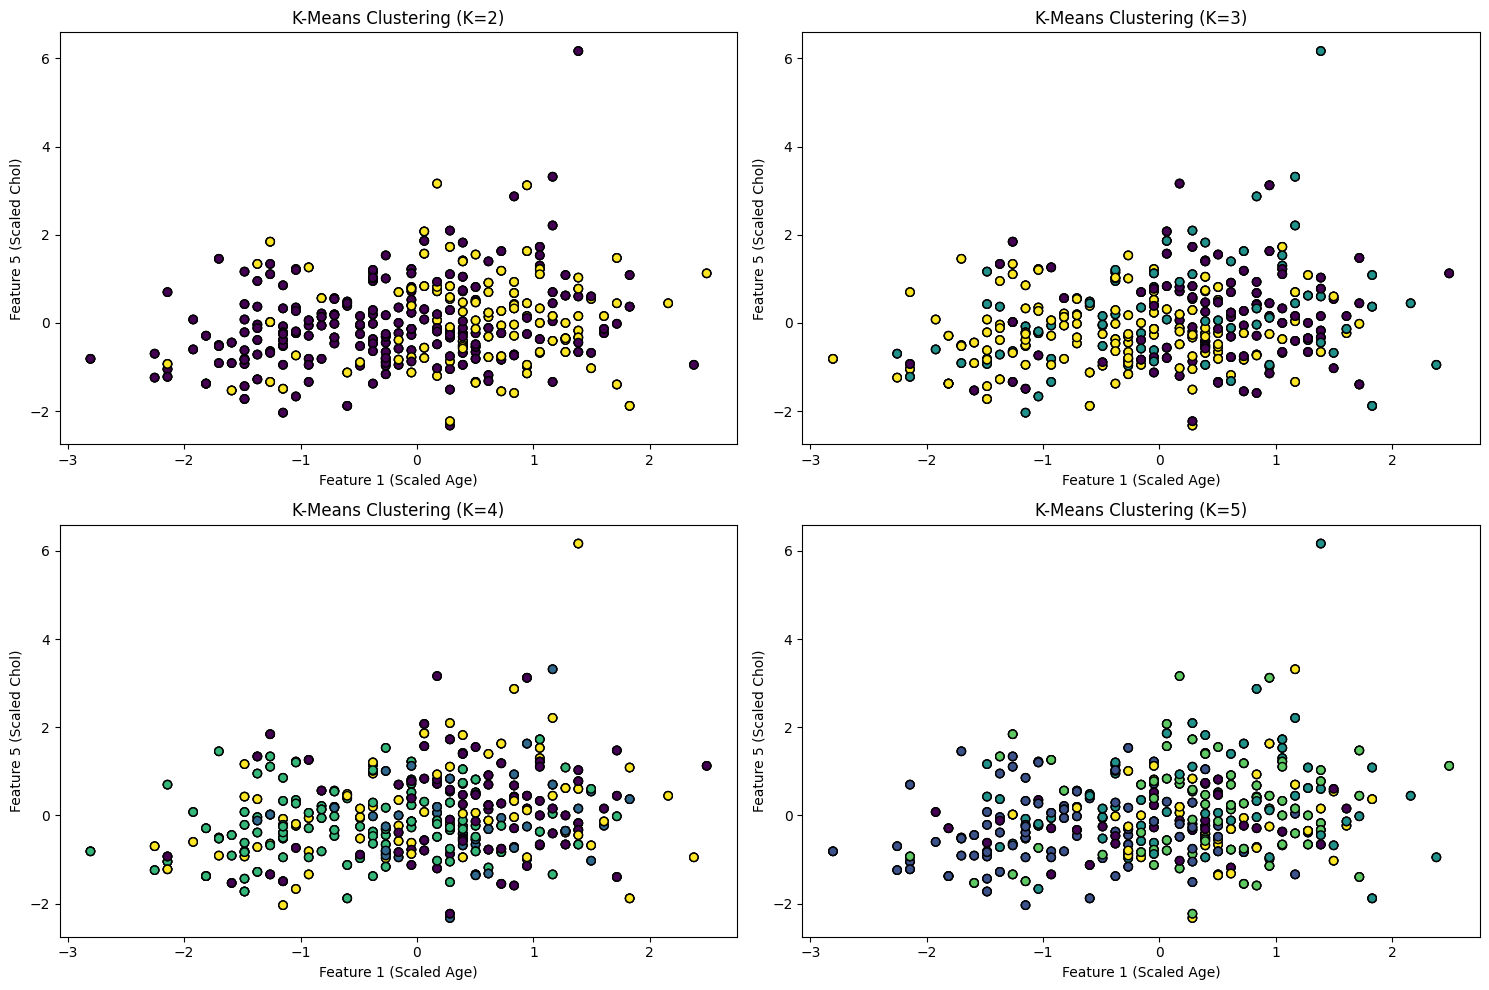

In [5]:
# Menyiapkan visualisasi untuk K=2 hingga K=5
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, k in enumerate(range(2, 6)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Visualisasi sederhana menggunakan dua fitur pertama (Age vs Chol) sebagai contoh
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 4], c=clusters, cmap='viridis', marker='o', edgecolor='k')
    axes[i].set_title(f'K-Means Clustering (K={k})')
    axes[i].set_xlabel('Feature 1 (Scaled Age)')
    axes[i].set_ylabel('Feature 5 (Scaled Chol)')

plt.tight_layout()
plt.show()

PCA (2 Komponen) & Visualisasi Cluster

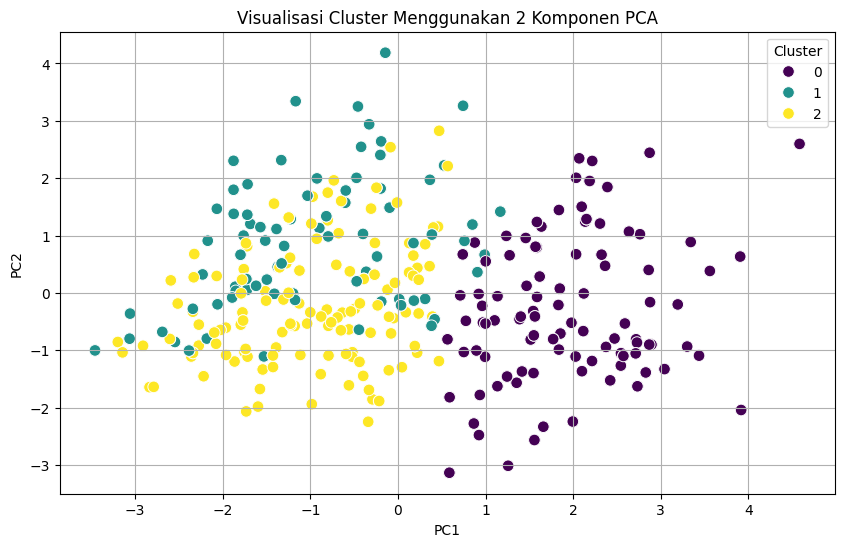

Total variance yang dijelaskan oleh 2 komponen PCA: 33.34%


In [6]:
# Inisialisasi PCA untuk 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Membuat DataFrame baru untuk hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Mari kita visualisasikan K-Means terbaik (misal K=3) pada hasil PCA
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Plotting PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=70)
plt.title('Visualisasi Cluster Menggunakan 2 Komponen PCA')
plt.grid(True)
plt.show()

# Menampilkan Variance Ratio
print(f"Total variance yang dijelaskan oleh 2 komponen PCA: {sum(pca.explained_variance_ratio_)*100:.2f}%")